Sveučilište u Zagrebu<br>
Fakultet elektrotehnike i računarstva

# Strojno učenje

<a href="http://www.fer.unizg.hr/predmet/su">http://www.fer.unizg.hr/predmet/su</a>

Ak. god. 2015./2016.

# Bilježnica 10: Vrednovanje modela

(c) 2015 Jan Šnajder

<i>Verzija: 0.1 (2015-12-19)</i>

In [2]:
# Učitaj osnovne biblioteke...
import scipy as sp
import sklearn
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Sadržaj

* Matrica zabune

* Osnovne mjere

* F-mjera

* Višeklasna klasifikacija

* Procjena pogreške

* Statističko testiranje

* Usporedba klasifikatora

# Matrica zabune

In [42]:
y_test = sp.random.choice((0,1), size=10); y_test

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0])

In [50]:
y_pred = sp.random.choice((0,1), size=10); y_pred

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 1])

* [Skica: retci -> klasifikacija, stupci -> stvarno]

In [105]:
def cm(y_true, y_pred):
    tp = 0
    fp = 0
    fn = 0
    tn = 0
    for (t, p) in zip(y_true, y_pred):
        if t == 0 and p == 1: fp += 1
        elif t == 1 and p == 0: fn += 1
        elif t == 1 and p == 1: tp += 1
        else: tn += 1
    return sp.array([[tp, fp], [fn, tn]])
        

In [106]:
cm(y_test, y_pred)

array([[1, 3],
       [4, 2]])

In [102]:
from sklearn.metrics import confusion_matrix

* [Skica: retci -> stvarno, stupci -> klasifikacija]

In [103]:
confusion_matrix(y_test, y_pred)

array([[2, 3],
       [4, 1]])

In [104]:
confusion_matrix(y_test, y_pred, labels=[1,0])

array([[1, 4],
       [3, 2]])

# Osnovne mjere

* [Skica: TP-FP-TN-FN]


* **Točnost** (engl. *accuracy*)

$$
\mathrm{Acc} = \frac{\mathrm{TP}+\mathrm{TN}}{N} = \frac{\mathrm{TP}+\mathrm{TN}}{\mathrm{TP}+\mathrm{TN}+\mathrm{FP}+\mathrm{FN}}
$$


* **Preciznost** (engl. *precision*)

$$
\mathrm{P} = \frac{\mathrm{TP}}{\mathrm{TP}+\mathrm{FP}}
$$


* **Odziv** (engl. *recall*), true positive rate, specificity

$$
\mathrm{R} = \mathrm{TPR} = \frac{\mathrm{TP}}{\mathrm{TP}+\mathrm{FN}}
$$

* **Fall-out**, false positive rate

$$
\mathrm{FPR} = \frac{\mathrm{FP}}{\mathrm{FP}+\mathrm{TN}}
$$


### Primjer

In [107]:
cm(y_test, y_pred)

array([[1, 3],
       [4, 2]])

In [121]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [122]:
accuracy_score(y_test, y_pred)

0.29999999999999999

In [94]:
precision_score(y_test, y_pred)

0.25

In [112]:
recall_score(y_test, y_pred)

0.20000000000000001

### Primjer: Titanic dataset

In [604]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Imputer

titanic_df = pd.read_csv("../data/titanic-train.csv")
titanic_df.drop(['PassengerId'], axis=1, inplace=True)
titanic_df1 = titanic_df[['Pclass', 'Sex', 'Age','Survived']]
titanic_X = titanic_df[['Pclass', 'Sex', 'Age']].as_matrix()

titanic_y = titanic_df['Survived'].as_matrix()

le = LabelEncoder()
titanic_X[:,1] = le.fit_transform(titanic_X[:,1])

imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
titanic_X = imp.fit_transform(titanic_X)

In [605]:
titanic_X

array([[  3.        ,   1.        ,  22.        ],
       [  1.        ,   0.        ,  38.        ],
       [  3.        ,   0.        ,  26.        ],
       ..., 
       [  3.        ,   0.        ,  29.69911765],
       [  1.        ,   1.        ,  26.        ],
       [  3.        ,   1.        ,  32.        ]])

In [497]:
titanic_y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1,

In [606]:
shape(titanic_X), shape(titanic_y)

((891, 3), (891,))

In [607]:
from sklearn import cross_validation
X_train, X_test, y_train, y_test = cross_validation.train_test_split(titanic_X, titanic_y, train_size=2.0/3, random_state=42)

In [608]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1)
lr.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)

In [609]:
lr.predict(X_train)

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0,

In [610]:
y_pred_lr = lr.predict(X_test); y_pred_lr

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0])

In [611]:
y_test

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0])

In [612]:
cm(y_test, y_pred_lr)

array([[ 84,  23],
       [ 36, 154]])

In [613]:
accuracy_score(y_test, y_pred_lr)

0.80134680134680136

In [614]:
lr.score(X_test, y_test)

0.80134680134680136

In [615]:
lr.score(X_train, y_train)

0.78282828282828287

In [616]:
precision_score(y_test, y_pred_lr, pos_label=1)

0.78504672897196259

In [617]:
recall_score(y_test, y_pred_lr, pos_label=1)

0.69999999999999996

In [618]:
from sklearn.svm import SVC
svm = SVC(C=1)
svm.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [619]:
svm.score(X_test, y_test)

0.79797979797979801

In [620]:
y_pred_svm = svm.predict(X_test); y_pred_svm

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0])

In [621]:
cm(y_test, y_pred_svm)

array([[ 81,  21],
       [ 39, 156]])

In [622]:
precision_score(y_test, y_pred_svm, pos_label=1)

0.79411764705882348

In [623]:
recall_score(y_test, y_pred_svm, pos_label=1)

0.67500000000000004

### Variranje klasifikacijskog praga

In [624]:
y_scores_lr = lr.predict_proba(X_test)[:,1]; y_scores_lr

array([ 0.11923502,  0.22993797,  0.13507455,  0.80220377,  0.6158762 ,
        0.87165829,  0.55991501,  0.14210781,  0.60888291,  0.88275876,
        0.38063556,  0.09882394,  0.55991501,  0.11877033,  0.21715615,
        0.88725575,  0.36343027,  0.55991501,  0.24053704,  0.34656751,
        0.1283373 ,  0.3911077 ,  0.59830943,  0.13507455,  0.11923502,
        0.15322775,  0.37027331,  0.22993797,  0.16505043,  0.55518769,
        0.13680483,  0.58764368,  0.40629524,  0.55991501,  0.13855373,
        0.12347423,  0.41234677,  0.55991501,  0.86492085,  0.11923502,
        0.25705129,  0.12032082,  0.11923502,  0.11923502,  0.50385484,
        0.14210781,  0.13680483,  0.12999426,  0.1283373 ,  0.31083838,
        0.64672175,  0.82240026,  0.10419704,  0.47406202,  0.07448779,
        0.88427478,  0.22733998,  0.82666263,  0.72570231,  0.59830943,
        0.13336276,  0.78533104,  0.74574443,  0.40629524,  0.11923502,
        0.65674983,  0.25705129,  0.12032082,  0.14032136,  0.82

In [625]:
print precision_score(y_test, y_pred_lr)
print recall_score(y_test, y_pred_lr)

0.785046728972
0.7


In [626]:
threshold = 0.4
y_pred_lr_tweaked = map(lambda s : 1 if s > threshold else 0, y_scores_lr)
print y_pred_lr_tweaked

[0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0]


In [627]:
print precision_score(y_test, y_pred_lr_tweaked)
print recall_score(y_test, y_pred_lr_tweaked)

0.752
0.783333333333


### Krivulja preciznost-odziv

In [628]:
from sklearn.metrics import precision_recall_curve

In [629]:
pr, re, _ = precision_recall_curve(y_test, y_scores_lr, pos_label=1)

In [630]:
pr

array([ 0.40955631,  0.40753425,  0.40893471,  0.41034483,  0.41176471,
        0.41319444,  0.41463415,  0.41608392,  0.41901408,  0.42198582,
        0.42348754,  0.425     ,  0.4265233 ,  0.42753623,  0.46747967,
        0.475     ,  0.4789916 ,  0.47863248,  0.48275862,  0.48908297,
        0.49557522,  0.49777778,  0.5045045 ,  0.51612903,  0.5258216 ,
        0.52830189,  0.53623188,  0.54679803,  0.55276382,  0.56410256,
        0.57291667,  0.57591623,  0.57894737,  0.57671958,  0.57754011,
        0.58064516,  0.58378378,  0.58695652,  0.59016393,  0.59668508,
        0.6       ,  0.60335196,  0.61714286,  0.62427746,  0.62790698,
        0.63157895,  0.63313609,  0.63690476,  0.64457831,  0.64848485,
        0.65243902,  0.65644172,  0.67295597,  0.68152866,  0.69032258,
        0.69934641,  0.70394737,  0.70860927,  0.71333333,  0.7114094 ,
        0.71621622,  0.71428571,  0.71917808,  0.71724138,  0.72222222,
        0.72535211,  0.72340426,  0.72142857,  0.73188406,  0.73

In [631]:
re

array([ 1.        ,  0.99166667,  0.99166667,  0.99166667,  0.99166667,
        0.99166667,  0.99166667,  0.99166667,  0.99166667,  0.99166667,
        0.99166667,  0.99166667,  0.99166667,  0.98333333,  0.95833333,
        0.95      ,  0.95      ,  0.93333333,  0.93333333,  0.93333333,
        0.93333333,  0.93333333,  0.93333333,  0.93333333,  0.93333333,
        0.93333333,  0.925     ,  0.925     ,  0.91666667,  0.91666667,
        0.91666667,  0.91666667,  0.91666667,  0.90833333,  0.9       ,
        0.9       ,  0.9       ,  0.9       ,  0.9       ,  0.9       ,
        0.9       ,  0.9       ,  0.9       ,  0.9       ,  0.9       ,
        0.9       ,  0.89166667,  0.89166667,  0.89166667,  0.89166667,
        0.89166667,  0.89166667,  0.89166667,  0.89166667,  0.89166667,
        0.89166667,  0.89166667,  0.89166667,  0.89166667,  0.88333333,
        0.88333333,  0.875     ,  0.875     ,  0.86666667,  0.86666667,
        0.85833333,  0.85      ,  0.84166667,  0.84166667,  0.84

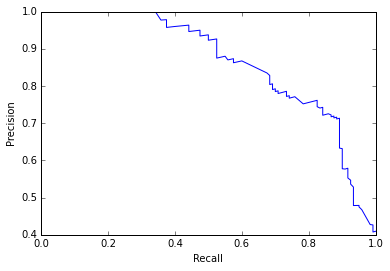

In [632]:
plt.plot(re, pr)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [633]:
from sklearn.metrics import average_precision_score

In [634]:
average_precision_score(y_test, y_scores_lr)

0.86434051934013389

In [635]:
y_scores_svm = svm.decision_function(X_test)[:,0]
print y_scores_svm

[-0.99981496 -0.99981841 -0.99966013  0.40222691 -0.18327508  0.75939843
  0.9536569  -0.99991568 -0.05034288  0.86014333  0.30132221 -1.00015152
  0.9536569  -1.0000322  -0.60394437  0.99978152 -0.18646874  0.9536569
 -0.61737032 -0.52426426 -1.00009455 -0.19295233 -0.68712759 -0.99966013
 -0.99981496 -1.24454265 -0.32524404 -0.99981841  0.42832029  0.89874226
 -1.0001764  -0.22659992 -0.99971299  0.9536569  -1.22409398 -0.73004156
 -0.55006399  0.9536569   1.00013691 -0.99981496 -0.99984105 -1.05689814
 -0.99981496 -0.99981496 -0.98486017 -0.99991568 -1.0001764  -0.93697004
 -1.00009455 -0.13916673  0.99968615  0.08807267 -1.05123109 -0.31542661
 -0.3003743   0.99960225 -0.91025477  0.14916905  1.00462638 -0.68712759
 -1.09165169  0.64565318  0.99976743 -0.99971299 -0.99981496  0.6008607
 -0.99984105 -1.05689814 -1.16630504  0.08807267  0.28145253  0.99960225
  0.54635734  0.99983341 -0.93697004 -1.00035035  1.00395461  1.0002736
  0.06918607 -1.00047849 -0.99991568  1.12181965  1.00

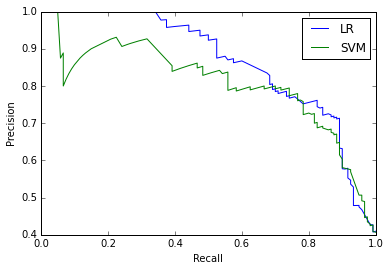

In [636]:
pr_lr, re_lr, _ = precision_recall_curve(y_test, y_scores_lr, pos_label=1)
pr_svm, re_svm, _ = precision_recall_curve(y_test, y_scores_svm, pos_label=1)
plt.plot(re_lr, pr_lr, label='LR')
plt.plot(re_svm, pr_svm, label='SVM')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [637]:
print average_precision_score(y_test, y_scores_lr)
print average_precision_score(y_test, y_scores_svm)

0.86434051934
0.805608502352


### ROC i AUC


* ROC = Receiver Operating Characteristics
  * TPR kao funkcija od FPR


* AUC = Area Under the (ROC) Curve

In [540]:
from sklearn.metrics import roc_curve, auc

In [552]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_scores_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_scores_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

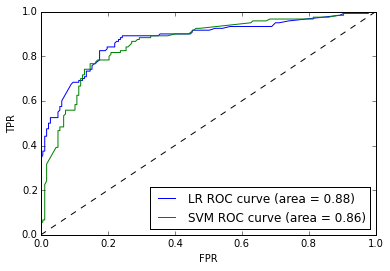

In [599]:
plt.plot(fpr_lr, tpr_lr, label='LR ROC curve (area = %0.2f)' % roc_auc_lr)
plt.plot(fpr_svm, tpr_svm, label='SVM ROC curve (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='lower right')
plt.show()

# F-mjera

* F1-mjera:
$$
F = \frac{2}{\frac{1}{P}+\frac{1}{R}} = \frac{2PR}{P+R}
$$


* F-beta:
$$
F_\beta = \frac{(1+\beta^2)PR}{\beta^2 P +R}
$$


* $F_{0.5}$ dvostruko naglašava preciznost, $F_{2}$ dvostruko naglašava recall

In [555]:
def f_beta(p, r, beta):
    return ((1 + beta**2) * p * r) / (beta**2 * p + r)

In [557]:
f_beta(0.5, 0.9, 1)

0.6428571428571429

In [560]:
f_beta(0.5, 0.9, 0.5)

0.5487804878048781

In [561]:
f_beta(0.5, 0.9, 2)

0.7758620689655172

In [562]:
(0.5 + 0.9) / 2

0.7

In [563]:
sqrt(0.5 * 0.9)

0.67082039324993692

In [565]:
2/(1/0.5 + 1/0.9)

0.6428571428571428

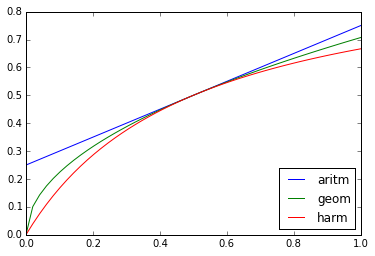

In [578]:
r = 0.5
xs = sp.linspace(0, 1)
plt.plot(xs, (xs + r)/2, label='aritm')
plt.plot(xs, sp.sqrt(xs*r), label='geom')
plt.plot(xs, 2/(1/xs + 1/r), label='harm')
plt.legend(loc='lower right')
plt.show()

# Višeklasna klasifikacija

In [669]:
data = sp.loadtxt("path/do/glass.data", delimiter=",", skiprows=1)

In [640]:
print data

[[   1.         1.52101   13.64    ...,    0.         0.         1.     ]
 [   2.         1.51761   13.89    ...,    0.         0.         1.     ]
 [   3.         1.51618   13.53    ...,    0.         0.         1.     ]
 ..., 
 [ 212.         1.52065   14.36    ...,    1.64       0.         7.     ]
 [ 213.         1.51651   14.38    ...,    1.57       0.         7.     ]
 [ 214.         1.51711   14.23    ...,    1.67       0.         7.     ]]


In [670]:
shape(data)

(214, 11)

In [671]:
glass_X, glass_y = data[:,1:10], data[:,10]

In [672]:
from sklearn import cross_validation
X_train, X_test, y_train, y_test = cross_validation.train_test_split(glass_X, glass_y, train_size=2.0/3, random_state=42)

In [673]:
X_train.shape, X_test.shape

((142, 9), (72, 9))

In [675]:
from sklearn.svm import SVC

In [676]:
m = SVC() # SVC(C=1, gamma='auto')

In [677]:
m.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [678]:
m.classes_

array([ 1.,  2.,  3.,  5.,  6.,  7.])

In [648]:
y_pred = m.predict(X_test); y_pred

array([ 2.,  7.,  1.,  7.,  2.,  2.,  1.,  2.,  2.,  1.,  5.,  2.,  1.,
        2.,  1.,  5.,  2.,  1.,  1.,  2.,  1.,  7.,  7.,  7.,  2.,  1.,
        1.,  1.,  5.,  1.,  1.,  2.,  1.,  2.,  1.,  7.,  5.,  1.,  1.,
        2.,  1.,  7.,  1.,  2.,  1.,  5.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  2.,  1.,  2.,  7.,  1.,  5.,  1.,  2.,  2.,  1.,  7.,  2.,
        2.,  1.,  2.,  2.,  1.,  2.,  1.])

In [649]:
from sklearn.metrics import confusion_matrix

In [650]:
confusion_matrix(y_test, y_pred)

array([[19,  4,  0,  0,  0,  0],
       [11, 13,  0,  1,  0,  0],
       [ 3,  1,  0,  0,  0,  0],
       [ 0,  2,  0,  4,  0,  0],
       [ 1,  2,  0,  1,  0,  0],
       [ 0,  1,  0,  0,  0,  9]])

In [651]:
from sklearn.metrics import f1_score

In [667]:
f1_score(y_test, y_pred, pos_label=l, average=None)

array([ 0.66666667,  0.54166667,  0.        ,  0.66666667,  0.        ,
        0.94736842])

In [668]:
sp.mean(_)

0.47039473684210531

In [597]:
f1_score(y_test, y_pred, average='macro')

0.47039473684210531

In [598]:
f1_score(y_test, y_pred, average='micro')

0.625

# Procjena pogreške

TODO

# Statističko testiranje

TODO

# Usporedba klasifikatora

TODO

# Sažetak

TODO